## CS7CS4/CSU44061 Machine Learning - W2 Assignment

### Michael Millard
Student ID:&emsp;24364218<br>
Date:&emsp;&emsp;&emsp;&ensp;30/09/2024<br>
Dataset ID:&emsp;# id:15-30-15 

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [35]:
# Read in data and set labels
labels = ["X1", "X2", "y"]
df = pd.read_csv("ML_W2_Dataset.csv", names=labels)
print(df.head())

# Split data frame up into X and y 
X1 = df.iloc[:, 0]
X2 = df.iloc[:, 1]
X = np.column_stack((X1, X2))
y = df.iloc[:, 2] 

     X1    X2  y
0 -0.32 -0.85 -1
1  0.22 -0.98 -1
2 -0.89 -0.31  1
3 -0.20 -0.16 -1
4 -0.73  0.61  1


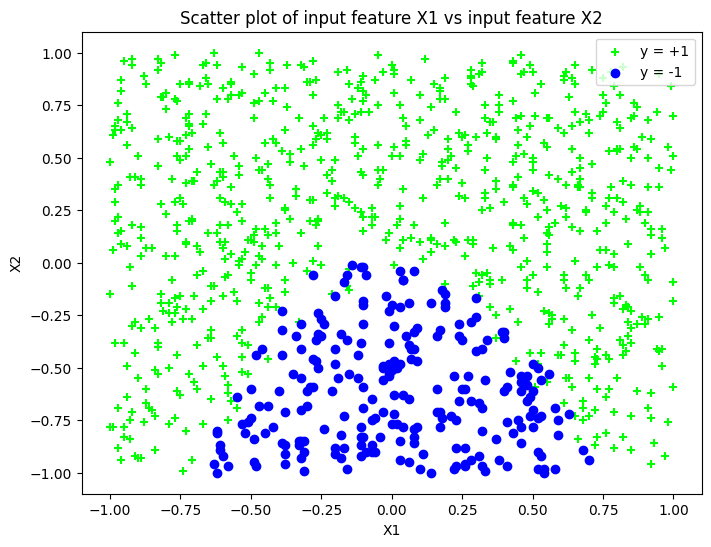

In [36]:
# (a)(i)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

**(a)(i) Continued**<br>
In the figure above, the input feature X1 values are plotted on the x-axis against the input feature X2 values on the y-axis. The label (y value) corresponding to each pair of (x1, x2) input feature points determines the colour and type of the marker. If the data point corresponds to a label of -1, it is plotted as a blue circle; else if it corresponds to a label of +1, it is plotted as a green cross. In order to plot the entire dataset with different markers, it is necessary to call "*plt.scatter(...)*" twice. In the first call to this function, only the data points with a label of +1 are extracted from X and plotted as green crosses. This is performed by the code snippet: "X1[y == 1]", which filters out any values in X1 where the corresponding label is not equal to +1. The same process is then applied to X2. The scatter function is then called a second time, this time only keeping X1 and X2 points corresponding to a label of -1 (i.e. "X2[y == -1]") and plotting them as blue circles on the same set of axes.

In [37]:
# (a)(ii)

# Logistic Regression
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X, y)
print(model.intercept_, model.coef_)

[2.31822945] [[-0.1536432   4.29777613]]


## Decision boundary
We have 2 features here. So we will get 2 coeffs and 1 intercept value from the logistic regression model.<br>
Recall that: $x = [1, x_{1}, x_{2}]^{T}$ and $\theta = [\theta_{0}, \theta_{1}, \theta_{2}]^{T}$. From which we get:<br>
$\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$<br>
Above we see that:<br>
$\theta_{0} = 2.3182 = c$, $\theta_{1} = -0.1536$ ($x_{1}$ coeff) and $\theta_{2} = 4.2978$ ($x_{2}$ coeff)<br>
Therefore, $\theta^{T}x = 2.3182 - 0.1536x_{1} + 4.2978x_{2}$.
The decision boundary occurs when the above expression is set equal to zero.<br>
$\therefore 2.3182 - 0.1536x_{1} + 4.2978x_{2} = 0$<br>
$\therefore 4.2978x_{2} = 0.1536x_{1} - 2.3182$<br>
$\therefore x_{2} = 0.03574x_{1} - 0.5394$<br>

[0.03574947] [-0.53940209]


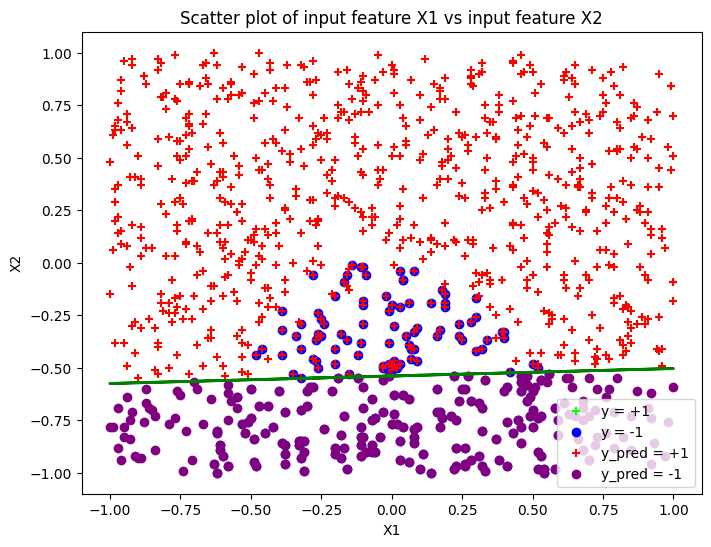

In [39]:
# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
print(m, c)
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.34733354] [[-0.01482675  0.36290947]]


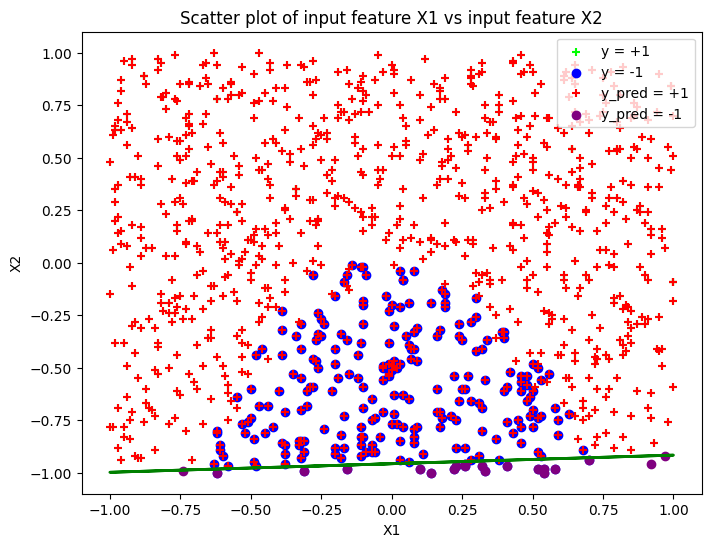

In [40]:
# (b)(i)

# C = 0.001
model = LinearSVC(C=0.001).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.53841823] [[-0.03309155  0.90428622]]


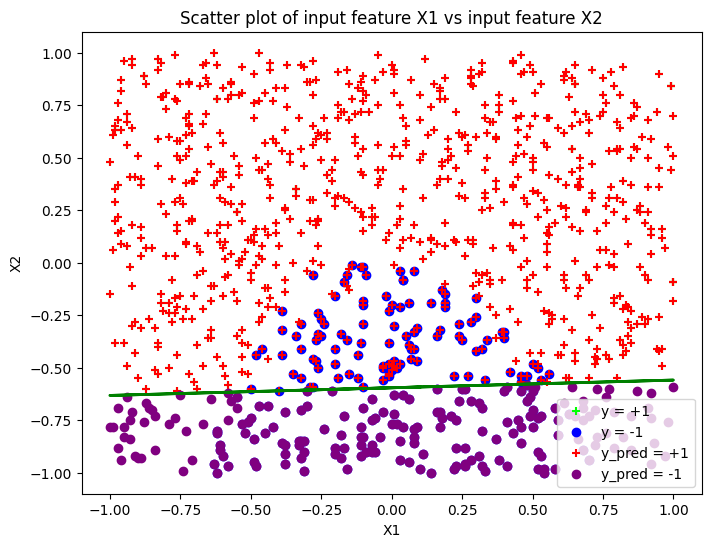

In [7]:
# C = 0.01
model = LinearSVC(C=0.01).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.71405504] [[-0.0460171   1.35043719]]


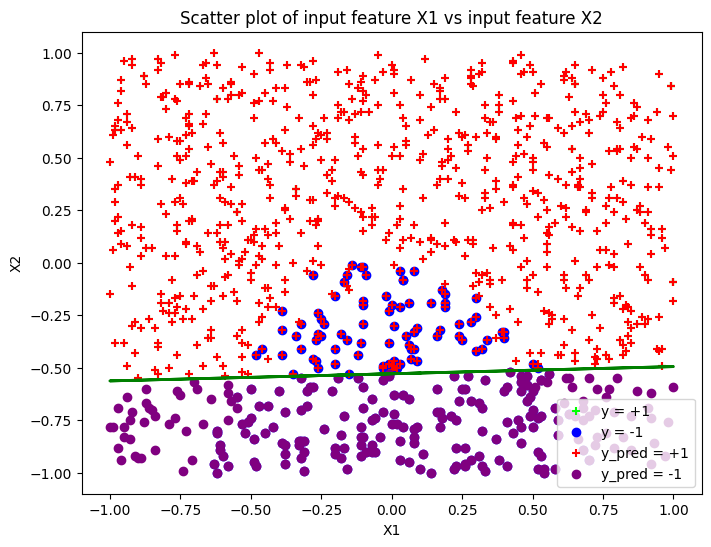

In [8]:
# C = 0.1
model = LinearSVC(C=0.1).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.76276037] [[-0.04822025  1.45795924]]


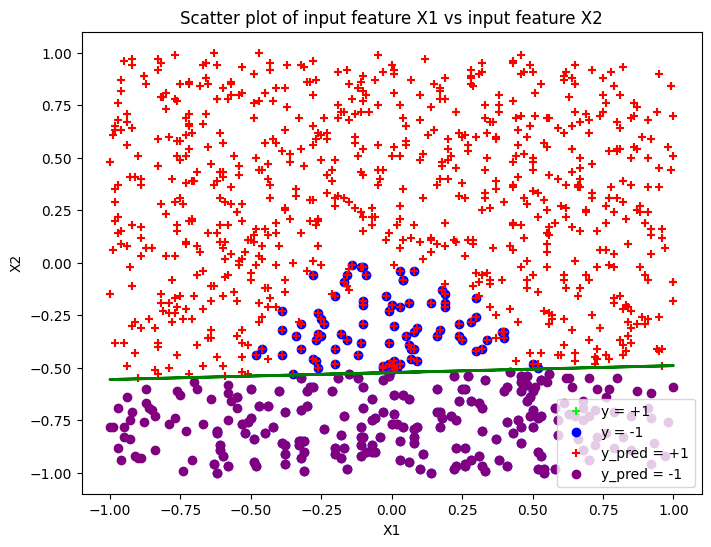

In [9]:
# C = 1.0
model = LinearSVC(C=1.0).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.76866987] [[-0.04848261  1.47066801]]


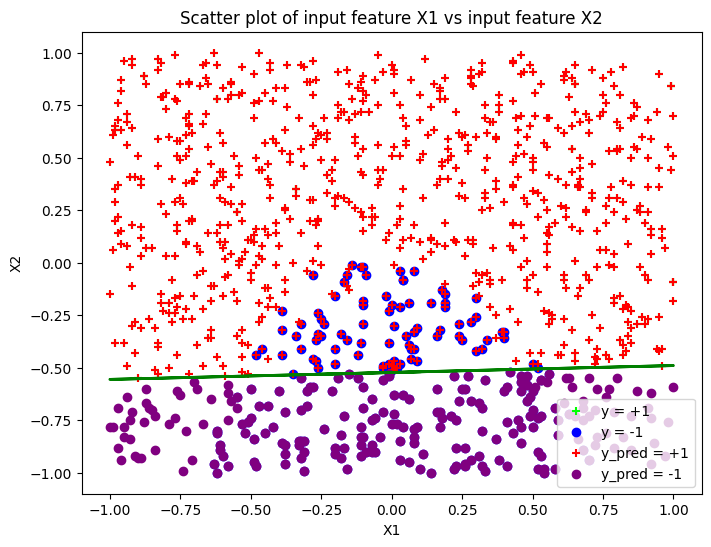

In [10]:
# C = 10.0
model = LinearSVC(C=10.0).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[0.76927126] [[-0.04850909  1.47195892]]


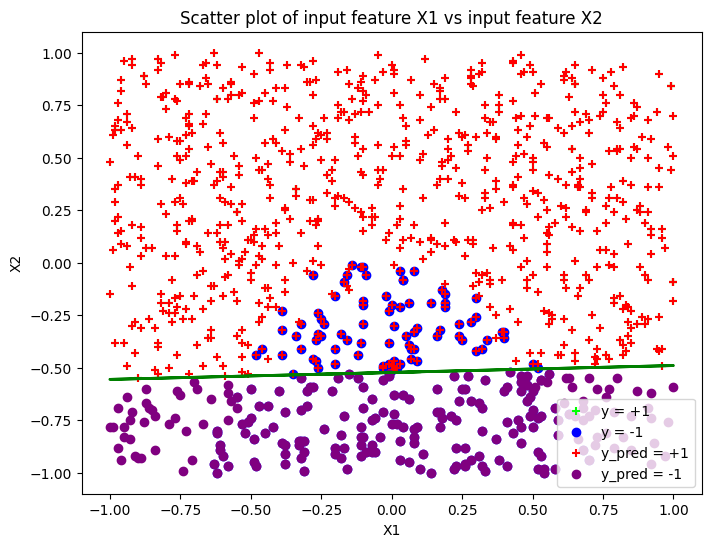

In [11]:
# C = 100.0
model = LinearSVC(C=100.0).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

[-0.0056076] [[-0.22915866  6.47149566 13.37058141 -0.34695176]]


ValueError: too many values to unpack (expected 2)

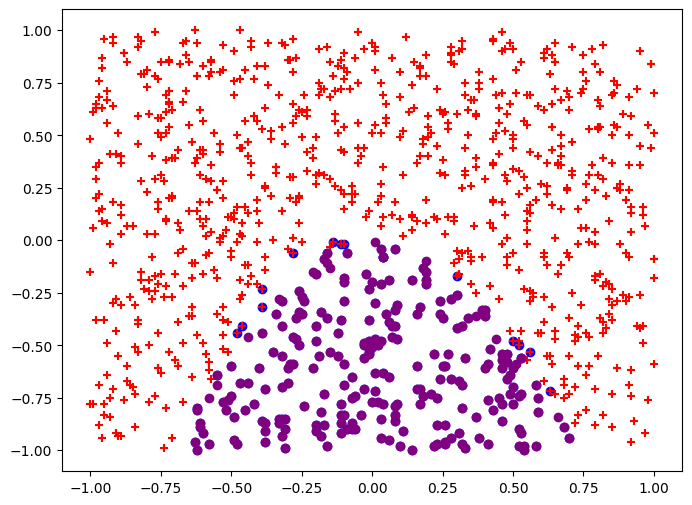

In [34]:
# C = 1000.0
model = LinearSVC(C=1000.0).fit(X, y)
print(model.intercept_, model.coef_)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = m * x1 + c
theta0 = model.intercept_
theta1, theta2 = model.coef_.T
m = -theta1 / theta2
c = - theta0 / theta2
y_db = m * X1 + c
plt.plot(X1, y_db, color='green', linewidth=2)
print(m, c)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend()

# Show the plot
plt.show()

## Decision boundary
We have 4 features here. So we will get 4 coeffs and 1 intercept value from the logistic regression model.<br>
Recall that: $x = [1, x_{1}, x_{2}, x_{3}, x_{4}]^{T}$ and $\theta = [\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}]^{T}$. From which we get:<br>
$\theta^{T}x = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + \theta_{4}x_{4}$<br>
Above we see that:<br>
$\theta_{0} = 0.1788 = c$, $\theta_{1} = -0.7464$ ($x_{1}$ coeff), $\theta_{2} = 20.6922$ ($x_{2}$ coeff), $\theta_{3} = 40.5827$ ($x_{3}$ coeff), and $\theta_{4} = -0.03798$ ($x_{4}$ coeff)<br>
Therefore, $\theta^{T}x = 0.1788 - 0.7464x_{1} + 20.6922x_{2} + 40.5827x_{3} - 0.03798x_{4}$.<br>
The decision boundary occurs when the above expression is set equal to zero.<br>
$\therefore 0.1788 - 0.7464x_{1} + 20.6922x_{2} + 40.5827x_{3} - 0.03798x_{4} = 0$<br>
Since $x_{3} = x_{1}^{2}$ and $x_{4} = x_{2}^{2}$, we can sub these in and solve for the decision boundary.<br>
$\therefore 0.1788 - 0.7464x_{1} + 40.5827x_{1}^{2} + 20.6922x_{2} - 0.03798x_{2}^{2} = 0$<br>
Ignoring $x_{2}^{2}$ term for now. It has a very small coefficient.<br>
$\therefore x_{2} = (-0.1788/20.6922) + (0.7464/20.6922)x_{1} - (40.5827/20.6922)x_{1}^{2}$<br>
Not subbing in for $x_{4}$ gives:<br>
$\therefore x_{2} = (-0.1788/20.6922) - (0.03798/20.6922)x_{4} + (0.7464/20.6922)x_{1} - (40.5827/20.6922)x_{1}^{2}$<br>
Solving "-1 roots" gives range of X1 values to plot parabola with (ignoring $x_{4}$ again).<br>
$(-0.1788/20.6922) + (0.7464/20.6922)x_{1} - (40.5827/20.6922)x_{1}^{2} = -1$<br>
Which is essentially just solving the previous parabola formula with an additional y-shift, which gives:<br>
$[(-0.1788/20.6922) + 1] + (0.7464/20.6922)x_{1} - (40.5827/20.6922)x_{1}^{2} = 0$<br>
From which we find: $x_{1l} = -0.7018$ and $x_{1u} = 0.7202$

a = -1.961258, b = 0.036070, c = -0.008639
theta4 = -0.037979
x_lower = -0.701829, x_upper = 0.720220


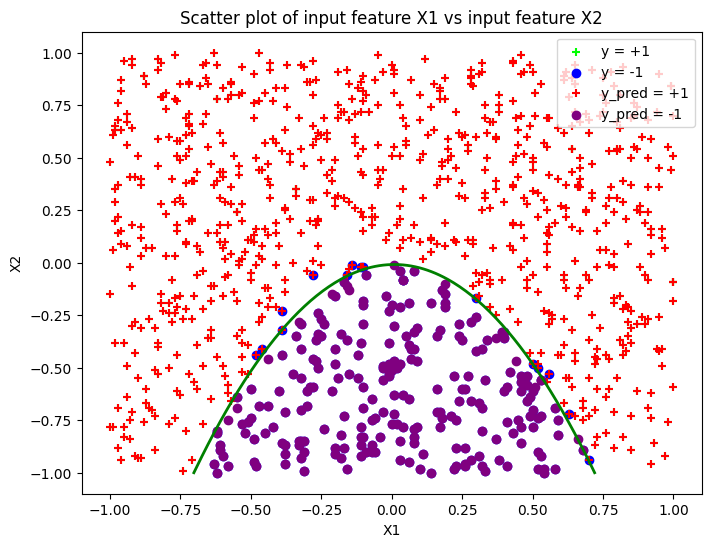

In [33]:
# (c)(i)
X3 = X1*X1
X4 = X2*X2
X = np.column_stack((X1, X2, X3, X4))

# Logistic Regression
model = LogisticRegression(penalty=None, solver='lbfgs')
model.fit(X, y)

# Create scatter plot ('+' for +1 labels, '-' for -1 labels)
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 1], X2[y == 1], marker='+', color='lime', label='y = +1')
plt.scatter(X1[y == -1], X2[y == -1], marker='o', color='blue', label='y = -1')

# Add the trained logistic regression model's predictions on the training data to the plot
ypred = model.predict(X)
plt.scatter(X1[ypred == 1], X2[ypred == 1], marker='+', color='red', label='y_pred = +1')
plt.scatter(X1[ypred == -1], X2[ypred == -1], marker='o', color='purple', label='y_pred = -1')

# Decision boundary x2 = a*x1^2 + b*x1 + c
theta0 = model.intercept_
theta1, theta2, theta3, theta4 = model.coef_.T
a = -theta3 / theta2
b = -theta1 / theta2
c = -theta0 / theta2
print("a = %6f, b = %6f, c = %6f"%(a.item(), b.item(), c.item()))
print("theta4 = %6f"%(theta4.item()))

# Find x_range
d = c + 1
x_lower = (-b + np.sqrt(b**2 - 4*a*d))/(2*a)
x_upper = (-b - np.sqrt(b**2 - 4*a*d))/(2*a)
print("x_lower = %6f, x_upper = %6f"%(x_lower.item(), x_upper.item()))

# Create linspaced points to plot decision boundary
X_range = np.linspace(x_lower, x_upper, 200)
y_db = a * X_range ** 2 + b * X_range + c
plt.plot(X_range, y_db, color='green', linewidth=2)

# Label axes and add legend
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of input feature X1 vs input feature X2')
plt.legend(loc=1) # Upper right

# Show the plot
plt.show()